In [37]:
import pandas as pd
import geopandas as gpd
import matplotlib as plt
from shapely.geometry import LineString
import random 

In [8]:
fire_data_pat = "DATASETS/fire_data.csv"
fire_data = pd.read_csv(fire_data_pat)
fire_data

,latitude,longitude,date,hour
0,40.70000,-105.73700,2020-09-26,435
1,41.08900,-106.29900,2020-09-26,435
2,41.08400,-106.32300,2020-09-26,435
3,41.13500,-106.14300,2020-09-26,435
4,41.13000,-106.16700,2020-09-26,435
...,...,...,...,...
12070,19.56577,-92.23937,2020-09-27,1830
12071,19.58750,-92.20234,2020-09-27,1830
12072,19.59876,-92.29350,2020-09-27,1830
12073,27.87473,-81.76313,2020-09-27,1830


In [9]:
fire_geodata = gpd.GeoDataFrame(fire_data, geometry=gpd.points_from_xy(fire_data["longitude"], fire_data["latitude"]))
fire_geodata.crs = {'init': 'epsg:4326'}
fire_geodata

,latitude,longitude,date,hour,geometry
0,40.70000,-105.73700,2020-09-26,435,POINT (-105.73700 40.70000)
1,41.08900,-106.29900,2020-09-26,435,POINT (-106.29900 41.08900)
2,41.08400,-106.32300,2020-09-26,435,POINT (-106.32300 41.08400)
3,41.13500,-106.14300,2020-09-26,435,POINT (-106.14300 41.13500)
4,41.13000,-106.16700,2020-09-26,435,POINT (-106.16700 41.13000)
...,...,...,...,...,...
12070,19.56577,-92.23937,2020-09-27,1830,POINT (-92.23937 19.56577)
12071,19.58750,-92.20234,2020-09-27,1830,POINT (-92.20234 19.58750)
12072,19.59876,-92.29350,2020-09-27,1830,POINT (-92.29350 19.59876)
12073,27.87473,-81.76313,2020-09-27,1830,POINT (-81.76313 27.87473)


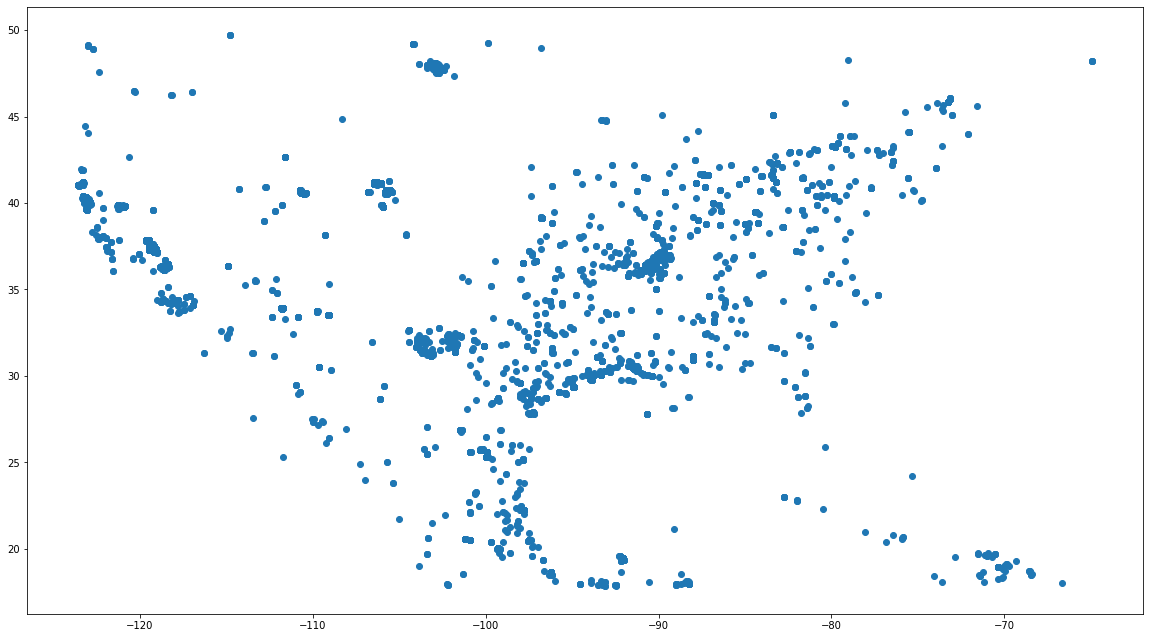

In [10]:
ax = fire_geodata.plot(figsize=(20,20))

In [11]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

In [12]:
X = fire_data['longitude'] 
X = X.to_numpy()

Y = fire_data['latitude'] 
Y = Y.to_numpy()

Points = [X, Y]

Points = np.array(Points)

Points = Points.transpose()

print(Points)
print(Points.shape)


[[-105.737     40.7    ]
 [-106.299     41.089  ]
 [-106.323     41.084  ]
 ...
 [ -92.2935    19.59876]
 [ -81.76313   27.87473]
 [ -81.41625   28.14973]]
(12075, 2)


<h2>
    Clusterizado de los datos
   
<!h2>

In [13]:
#bandwidth = estimate_bandwidth(Points, quantile=0.1)
#print(bandwidth)
bandwidth = 0.8
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(Points)

MeanShift(bandwidth=0.8, bin_seeding=True, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

In [14]:
cluster_centers = ms.cluster_centers_
#print(cluster_centers)
print(cluster_centers.shape)

(224, 2)


[ 0  0  0 ... 21 57 57]
(12075,)


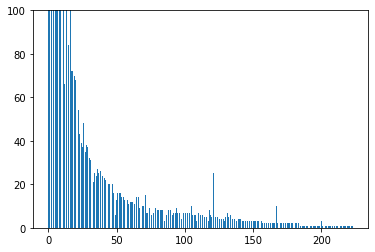

In [15]:
labels = ms.labels_
print(labels)
print(labels.shape)

import matplotlib.pyplot as plt
plt.hist(labels, bins='auto')
plt.ylim(0,100)
plt.show()

In [16]:
cluster_data = pd.DataFrame(cluster_centers, columns = ["X","Y"])
cluster_data

,X,Y
0,-106.101831,41.012036
1,-119.253491,37.406694
2,-123.126757,40.202125
3,-118.648776,36.319483
4,-121.185185,39.831447
...,...,...
219,-109.048460,35.317210
220,-111.717350,25.291730
221,-113.452510,27.579600
222,-120.656460,42.682140


In [17]:
clusters_geodata = gpd.GeoDataFrame(cluster_data, geometry=gpd.points_from_xy(cluster_data["X"], cluster_data["Y"]))
clusters_geodata.crs = {'init': 'epsg:4326'}
clusters_geodata

,X,Y,geometry
0,-106.101831,41.012036,POINT (-106.10183 41.01204)
1,-119.253491,37.406694,POINT (-119.25349 37.40669)
2,-123.126757,40.202125,POINT (-123.12676 40.20212)
3,-118.648776,36.319483,POINT (-118.64878 36.31948)
4,-121.185185,39.831447,POINT (-121.18519 39.83145)
...,...,...,...
219,-109.048460,35.317210,POINT (-109.04846 35.31721)
220,-111.717350,25.291730,POINT (-111.71735 25.29173)
221,-113.452510,27.579600,POINT (-113.45251 27.57960)
222,-120.656460,42.682140,POINT (-120.65646 42.68214)


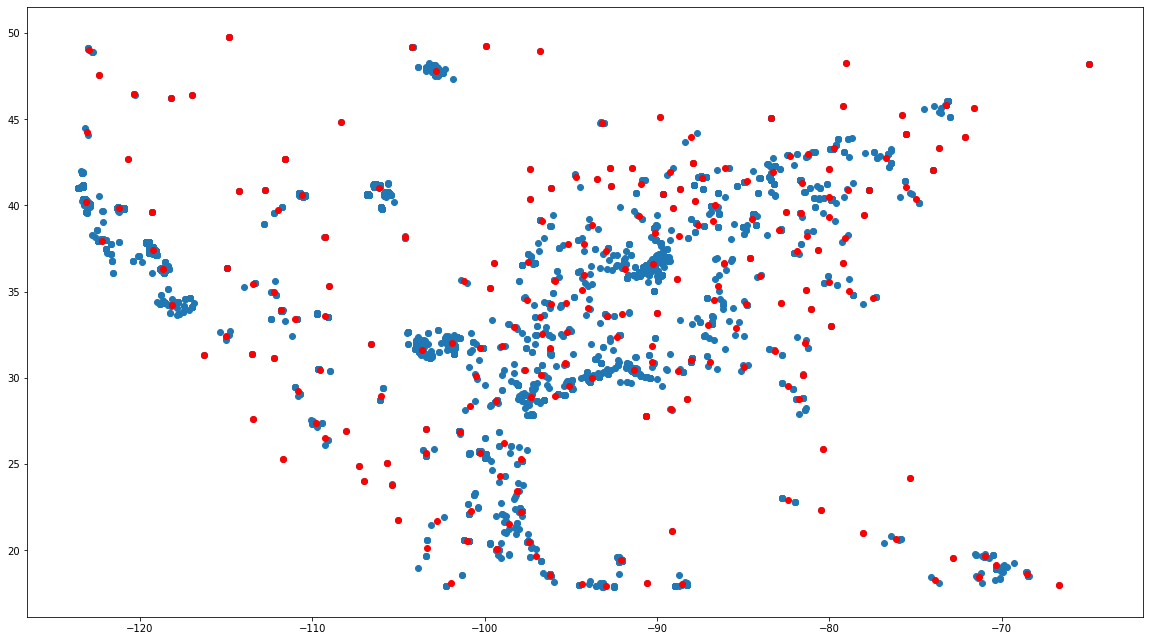

In [18]:
ax = fire_geodata.plot(figsize=(20,20))
clusters_geodata.plot(color='red', ax=ax)

In [19]:
fire_clusterized_geodata = fire_geodata
fire_clusterized_geodata['Cluster_label'] = labels.tolist()
fire_clusterized_geodata

,latitude,longitude,date,hour,geometry,Cluster_label
0,40.70000,-105.73700,2020-09-26,435,POINT (-105.73700 40.70000),0
1,41.08900,-106.29900,2020-09-26,435,POINT (-106.29900 41.08900),0
2,41.08400,-106.32300,2020-09-26,435,POINT (-106.32300 41.08400),0
3,41.13500,-106.14300,2020-09-26,435,POINT (-106.14300 41.13500),0
4,41.13000,-106.16700,2020-09-26,435,POINT (-106.16700 41.13000),0
...,...,...,...,...,...,...
12070,19.56577,-92.23937,2020-09-27,1830,POINT (-92.23937 19.56577),21
12071,19.58750,-92.20234,2020-09-27,1830,POINT (-92.20234 19.58750),21
12072,19.59876,-92.29350,2020-09-27,1830,POINT (-92.29350 19.59876),21
12073,27.87473,-81.76313,2020-09-27,1830,POINT (-81.76313 27.87473),57


In [20]:
clusters_geodata['Cluster_id'] = clusters_geodata.index
clusters_geodata

,X,Y,geometry,Cluster_id
0,-106.101831,41.012036,POINT (-106.10183 41.01204),0
1,-119.253491,37.406694,POINT (-119.25349 37.40669),1
2,-123.126757,40.202125,POINT (-123.12676 40.20212),2
3,-118.648776,36.319483,POINT (-118.64878 36.31948),3
4,-121.185185,39.831447,POINT (-121.18519 39.83145),4
...,...,...,...,...
219,-109.048460,35.317210,POINT (-109.04846 35.31721),219
220,-111.717350,25.291730,POINT (-111.71735 25.29173),220
221,-113.452510,27.579600,POINT (-113.45251 27.57960),221
222,-120.656460,42.682140,POINT (-120.65646 42.68214),222


In [21]:
fire_clusterized_geodata.drop(fire_clusterized_geodata[fire_clusterized_geodata.Cluster_label != 0].index).shape


(4844, 6)

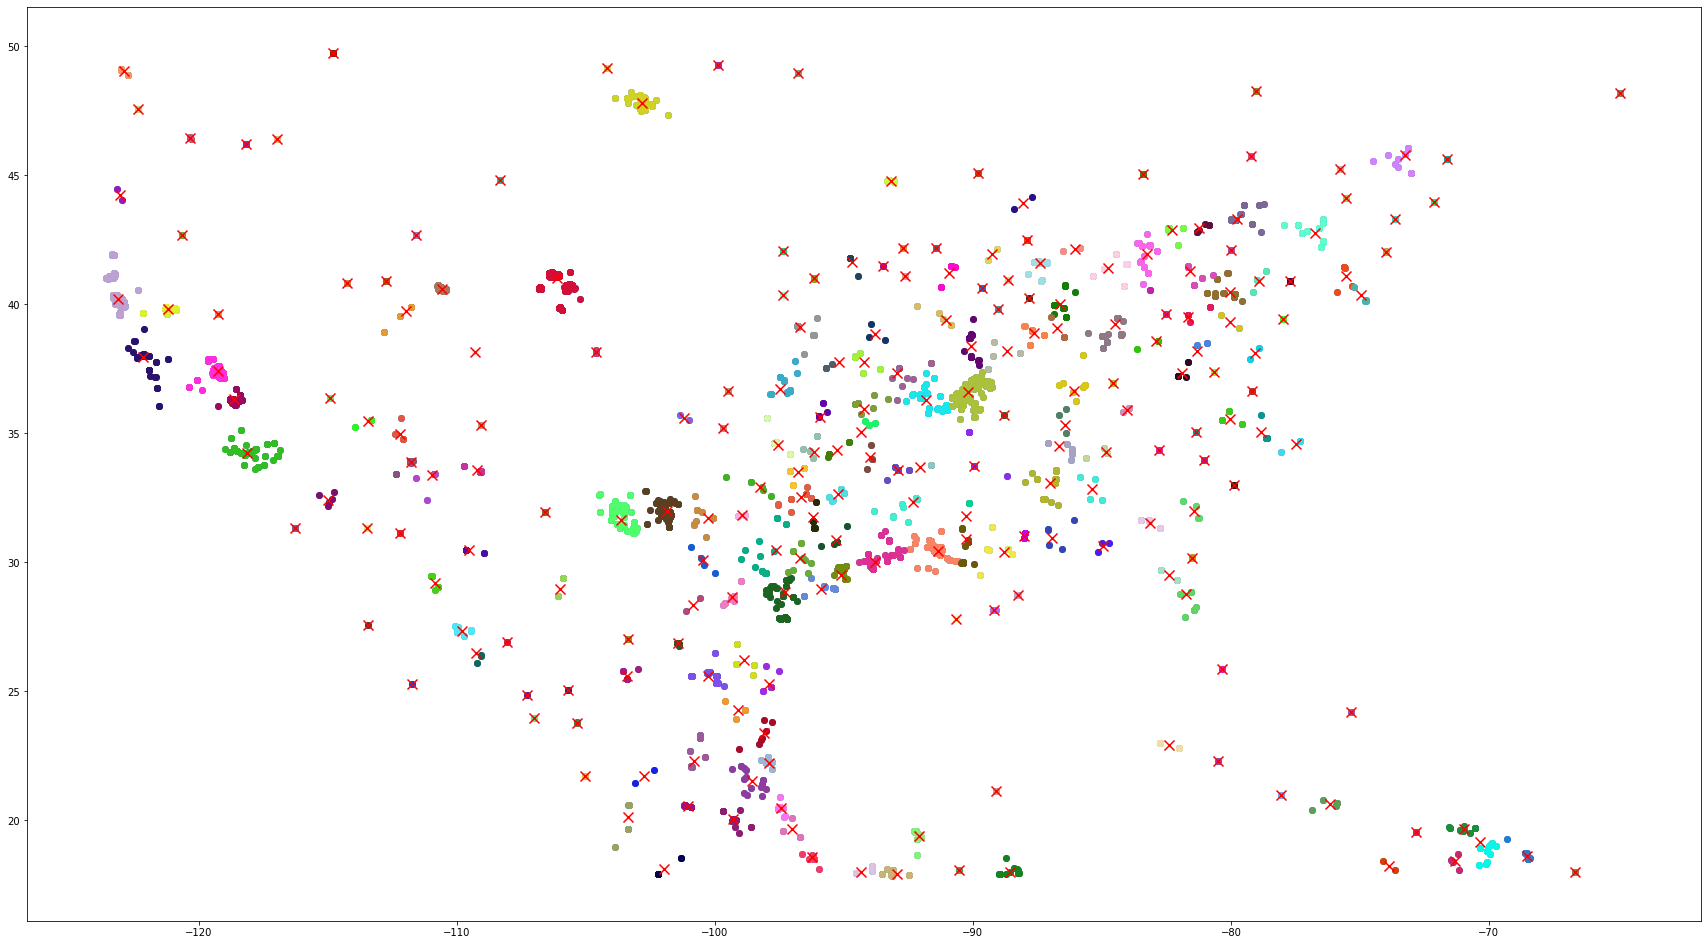

In [39]:
ax = fire_geodata.plot(figsize=(30,30))

for i in range(len(clusters_geodata)):
    
    r = lambda: random.randint(0,255)
    color = ('#%02X%02X%02X' % (r(),r(),r()))
    
    fire_clusterized_geodata.drop(fire_clusterized_geodata[fire_clusterized_geodata.Cluster_label != i].index).plot(color=color , ax=ax)
    
clusters_geodata.plot(color='red', marker="x",markersize = 100, ax=ax)


In [23]:
temp = fire_clusterized_geodata.drop(fire_clusterized_geodata[fire_clusterized_geodata.Cluster_label != 0].index)
temp
#len(temp)

,latitude,longitude,date,hour,geometry,Cluster_label
0,40.70000,-105.73700,2020-09-26,435,POINT (-105.73700 40.70000),0
1,41.08900,-106.29900,2020-09-26,435,POINT (-106.29900 41.08900),0
2,41.08400,-106.32300,2020-09-26,435,POINT (-106.32300 41.08400),0
3,41.13500,-106.14300,2020-09-26,435,POINT (-106.14300 41.13500),0
4,41.13000,-106.16700,2020-09-26,435,POINT (-106.16700 41.13000),0
...,...,...,...,...,...,...
11065,39.88284,-106.01428,2020-09-27,854,POINT (-106.01428 39.88284),0
11066,39.88145,-106.00544,2020-09-27,854,POINT (-106.00544 39.88145),0
11067,39.87958,-106.01514,2020-09-27,854,POINT (-106.01514 39.87958),0
11070,39.78549,-105.93424,2020-09-27,854,POINT (-105.93424 39.78549),0


In [24]:
temp.iloc[0]["longitude"]

-105.737

In [25]:
recent_release = clusters_geodata.iloc[0]
print(recent_release)

distances = temp.geometry.distance(recent_release.geometry) * 111 #conversion de grados a kilometros
print(distances)
print(distances.mean())


X                                                 -106.102
Y                                                   41.012
geometry      POINT (-106.1018314462117 41.01203557764756)
Cluster_id                                               0
Name: 0, dtype: object
0         53.287883
1         23.493999
2         25.816607
3         14.393708
4         14.959302
            ...    
11065    125.716892
11066    125.950280
11067    126.070350
11070    137.411587
11071    137.700266
Length: 4844, dtype: float64
33.696966267331796


In [26]:
mean_distance = []
max_distance = []
num_fires = []

for i in range(len(clusters_geodata)):

    reference = clusters_geodata.iloc[i]
    temp = fire_clusterized_geodata.drop(fire_clusterized_geodata[fire_clusterized_geodata.Cluster_label != i].index)
    distances = temp.geometry.distance(reference.geometry) * 111 #conversion de grados a kilometros
    
    mean_distance.append(distances.mean())
    max_distance.append(max(distances))
    num_fires.append(len(distances))
    

In [27]:
clusters_geodata['mean_distance'] = mean_distance
clusters_geodata['num_fires'] = num_fires
clusters_geodata['mean_density'] = clusters_geodata['num_fires'] / (3.1416 * (clusters_geodata['mean_distance'] ** 2))
clusters_geodata

,X,Y,geometry,Cluster_id,mean_distance,num_fires,mean_density
0,-106.101831,41.012036,POINT (-106.10183 41.01204),0,33.696966,4844,1.357912
1,-119.253491,37.406694,POINT (-119.25349 37.40669),1,20.557596,1563,1.177236
2,-123.126757,40.202125,POINT (-123.12676 40.20212),2,32.382690,1032,0.313259
3,-118.648776,36.319483,POINT (-118.64878 36.31948),3,14.199432,530,0.836726
4,-121.185185,39.831447,POINT (-121.18519 39.83145),4,10.871931,378,1.017953
...,...,...,...,...,...,...,...
219,-109.048460,35.317210,POINT (-109.04846 35.31721),219,0.000000,1,inf
220,-111.717350,25.291730,POINT (-111.71735 25.29173),220,0.000000,1,inf
221,-113.452510,27.579600,POINT (-113.45251 27.57960),221,0.000000,1,inf
222,-120.656460,42.682140,POINT (-120.65646 42.68214),222,0.000000,1,inf


In [28]:
clusters_geodata['valid_cluster'] = (clusters_geodata['num_fires'] > 1 ) & (clusters_geodata['mean_density'] > 0.01) 

In [29]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(clusters_geodata)

              X          Y                     geometry  Cluster_id  \
0   -106.101831  41.012036  POINT (-106.10183 41.01204)           0   
1   -119.253491  37.406694  POINT (-119.25349 37.40669)           1   
2   -123.126757  40.202125  POINT (-123.12676 40.20212)           2   
3   -118.648776  36.319483  POINT (-118.64878 36.31948)           3   
4   -121.185185  39.831447  POINT (-121.18519 39.83145)           4   
5   -111.790449  33.905875  POINT (-111.79045 33.90588)           5   
6    -90.198011  36.623524   POINT (-90.19801 36.62352)           6   
7   -110.576955  40.613781  POINT (-110.57696 40.61378)           7   
8   -101.856925  31.987538  POINT (-101.85693 31.98754)           8   
9    -87.379145  41.590613   POINT (-87.37914 41.59061)           9   
10  -109.226820  33.571976  POINT (-109.22682 33.57198)          10   
11   -91.347043  30.436813   POINT (-91.34704 30.43681)          11   
12   -95.127336  29.510184   POINT (-95.12734 29.51018)          12   
13  -1

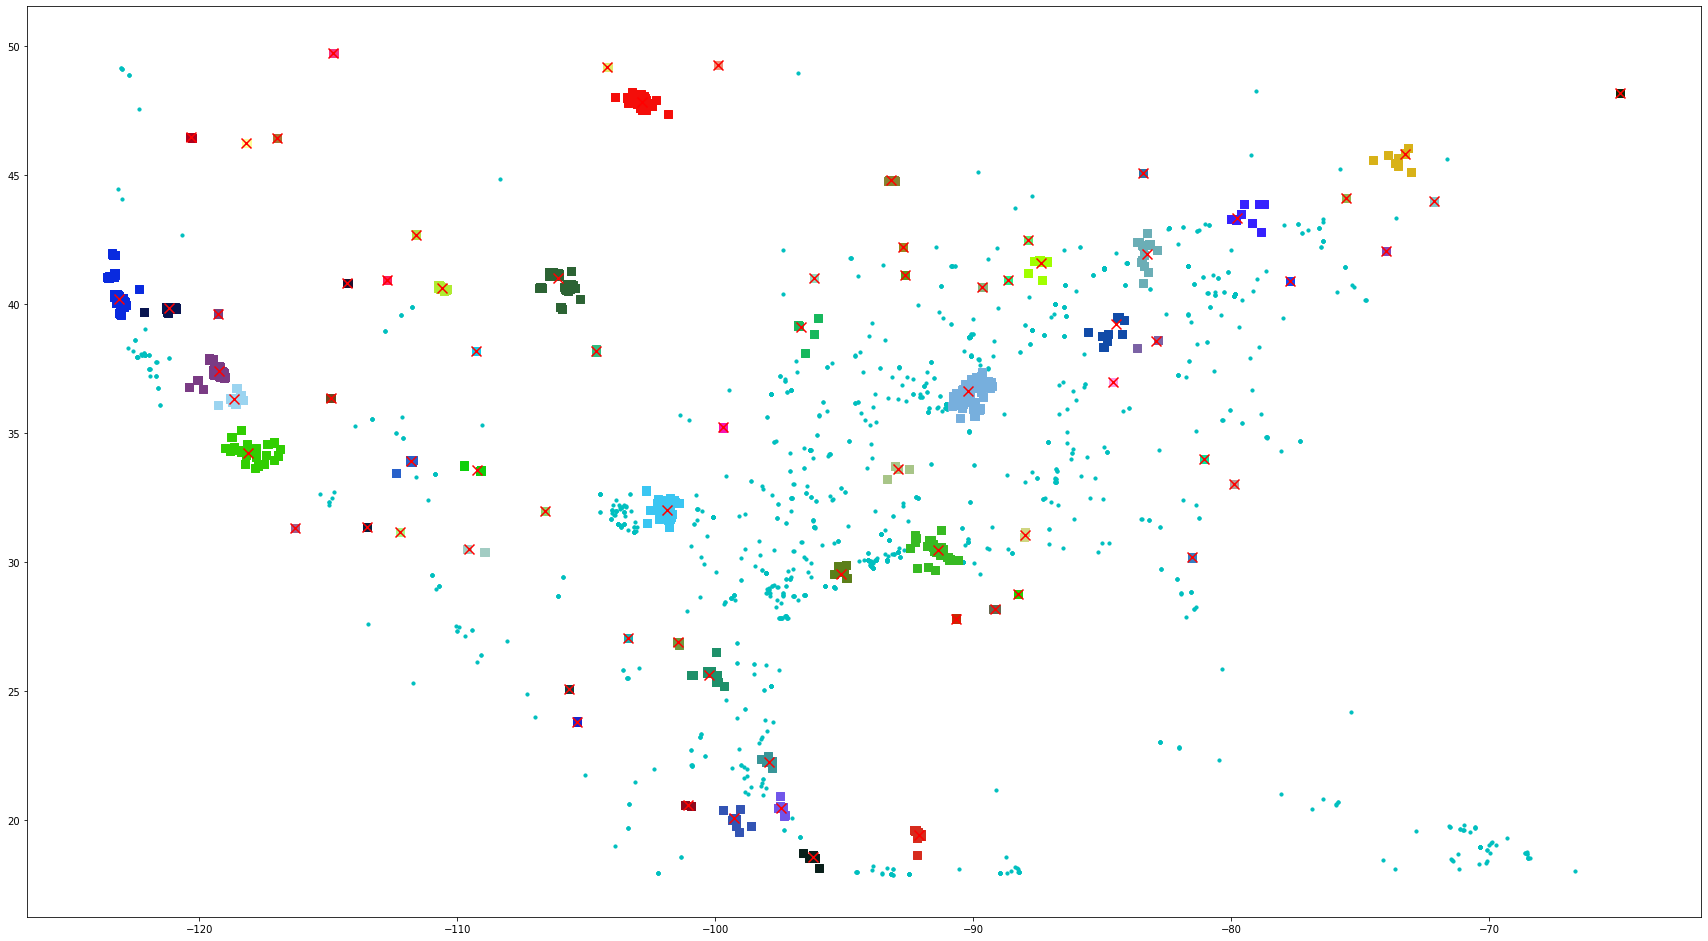

In [32]:
import random

ax = fire_geodata.plot(figsize=(30,30), color='c', markersize=10)

for i in range(len(clusters_geodata)):
    
    if clusters_geodata.iloc[i]["valid_cluster"]:
        
        r = lambda: random.randint(0,255)
        color = ('#%02X%02X%02X' % (r(),r(),r()))

        fire_clusterized_geodata.drop(fire_clusterized_geodata[fire_clusterized_geodata.Cluster_label != i].index).plot(color=color, marker="s",markersize=50, ax=ax)
        clusters_geodata.drop(clusters_geodata[clusters_geodata.Cluster_id  != i].index).plot(color='red', marker="x", markersize=100, ax=ax)
    

In [33]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [34]:
m_1 = folium.Map(location=[40,-95], tiles='openstreetmap', zoom_start=4)

for i in range(len(clusters_geodata)):
    
    if clusters_geodata.iloc[i]["valid_cluster"]:
        
        html="""
            <h3 align="center"> Fire Alert! </h3><br>
           
            <code>
                Latitude:  """ + str(clusters_geodata.iloc[i]['Y']) + """<br>
                Longitude: """ + str(clusters_geodata.iloc[i]['X']) + """ <br>
                Affected Area: """ + str(3.1416 *((clusters_geodata.iloc[i]['mean_distance'])**2)) + """ km2 <br>
                Heat points detected: """ + str(clusters_geodata.iloc[i]['num_fires']) + """ <br>
            </code>
            </p>
            """
        iframe = folium.IFrame(html=html, width=350, height=150)
        popup = folium.Popup(iframe, max_width=2650)
        
        Marker(
            [clusters_geodata.iloc[i]['Y'], clusters_geodata.iloc[i]['X']],
            #popup='Fire Alert!'+ 'Latitude:'+ str(clusters_geodata.iloc[i]['Y']) + 'Longitude:' + str(clusters_geodata.iloc[i]['X']),
            popup = popup,
            icon=folium.Icon(color='red', icon='info-sign')
              
        ).add_to(m_1)
        
        Circle(
            location=[clusters_geodata.iloc[i]['Y'], clusters_geodata.iloc[i]['X']],
            radius=clusters_geodata.iloc[i]["mean_distance"]*1000,
            color='darkred',
            fill=True,
            fill_color='darkred'
        ).add_to(m_1)
        
HeatMap(data=fire_clusterized_geodata[['latitude', 'longitude']], radius=9).add_to(m_1)

m_1

In [35]:
fire_clusterized_geodata
fire_clusterized_geodata.to_csv('DATASETS/fire_clusterized_geodata.csv',index=False)

In [36]:
clusters_geodata
clusters_geodata.to_csv('DATASETS/clusters_geodata.csv',index=False)